# Airbnb: predicción de precios de hosts

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("airbnb_data.csv")

In [3]:
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,...,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
1,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,Real Bed,strict,True,SF,Beautiful private room overlooking scenic view...,...,-122.429526,Comfort Suite San Francisco,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
2,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,Real Bed,moderate,True,LA,Arguably the best location (and safest) in dow...,...,-118.260439,"Near LA Live, Staple's. Starbucks inside. OWN ...",Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,120.0
3,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,Real Bed,moderate,True,SF,Garden Studio with private entrance from the s...,...,-122.501095,Cozy Garden Studio - Private Entry,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,True,NYC,This is a bright bedroom in an historic buildi...,...,-73.983880,Large East Village Bedroom To Let!,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,100.0


In [4]:
df.shape

(28877, 28)

In [5]:
df.columns

Index(['property_type', 'room_type', 'amenities', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds', 'price'],
      dtype='object')

In [6]:
df[['first_review', 'host_has_profile_pic','host_identity_verified', 'host_response_rate', 'host_since','instant_bookable', 'last_review']].head()

,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review
0,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23
1,2017-08-27,t,t,100%,2017-06-07,t,2017-09-05
2,2016-12-16,t,t,100%,2013-05-18,f,2017-04-12
3,2016-02-13,t,f,100%,2015-06-04,f,2017-09-24
4,2013-04-28,t,t,100%,2013-03-27,f,2016-11-15


# Limpieza de los datos

### Tareas por hacer:
1. Ver colinealidades entre variables contínuas
2. Limpieza de categóricas y datetimes.
3. Extraer los valores de "amenities" en distintas columnas.
4. Ver la manera de pasar a nominal la columna neighbourhood o dropearla.
5. NaN's
6. Outliers y normalización de variables contínuas.
7. Clasificación de zipcode.
8. De categóricas a nominal: One-Hot-Encoding, Label-encoding?

## 1. Colinealidades

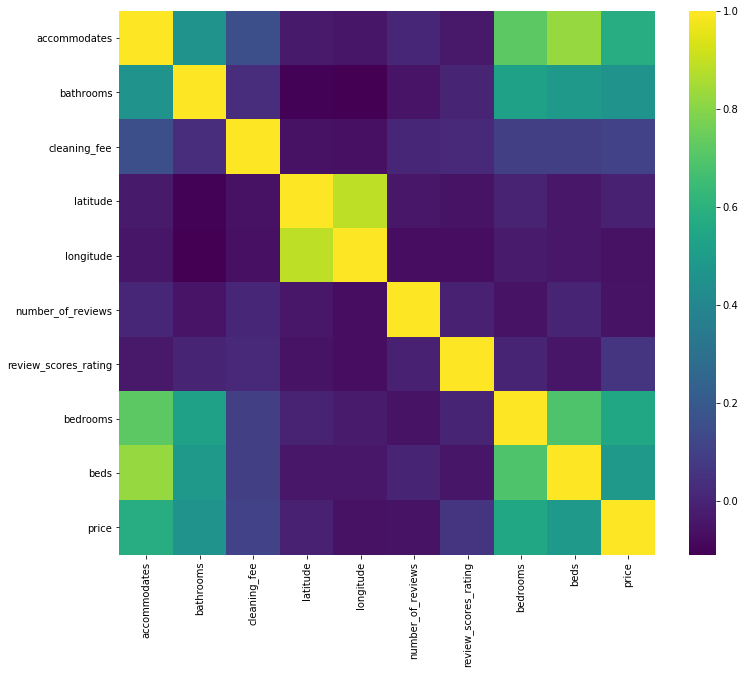

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='viridis');

In [8]:
#En este momento, la única correlación alta que existe es entre latitud y longitud.
#No usare esta información, así que dropeo estas variables:
df.drop("latitude", axis=1, inplace=True)
df.drop("longitude", axis=1, inplace=True)

## 2. Limpieza de categóricas y datetimes

### property_type

In [9]:
df.property_type.value_counts()

Apartment             18543
House                  6655
Condominium            1081
Townhouse               720
Loft                    552
Other                   260
Guesthouse              248
Bed & Breakfast         214
Bungalow                166
Guest suite              72
Dorm                     61
Villa                    54
In-law                   44
Hostel                   36
Cabin                    32
Timeshare                26
Camper/RV                24
Boat                     22
Boutique hotel           20
Castle                    9
Serviced apartment        9
Tent                      7
Hut                       4
Chalet                    4
Vacation home             4
Tipi                      3
Treehouse                 2
Earth House               2
Cave                      2
Yurt                      1
Name: property_type, dtype: int64

In [10]:
#voy a tomar en cuenta los primeros 6 conceptos, ya que se llevan más del 90% de los datos. 
#A los demás los voy a clasificar como 'Others'

In [11]:
for e in range(len(df)):
    if df.property_type[e] not in ['Apartment','House','Condominium','Townhouse','Loft','Guesthouse']:
        df.property_type[e] = "Other"

In [12]:
df.property_type.value_counts()

Apartment      18543
House           6655
Condominium     1081
Other           1078
Townhouse        720
Loft             552
Guesthouse       248
Name: property_type, dtype: int64

### room_type

In [13]:
df.room_type.value_counts()

Entire home/apt    16158
Private room       11993
Shared room          726
Name: room_type, dtype: int64

### bed_type

In [14]:
df.bed_type.value_counts()
#Casi el 100% de los datos estan concentrados en "Real Bed". No se si esto represente un sezgo para el modelo después.
#Aun si pusiera como "Others" los demás valores, creo que no tiene mucho caso esta columna.

Real Bed         28092
Futon              319
Pull-out Sofa      246
Airbed             146
Couch               74
Name: bed_type, dtype: int64

In [15]:
df.drop("bed_type", axis=1, inplace=True)

In [16]:
df.shape

(28877, 25)

### cancellation_policy

In [17]:
df.cancellation_policy.value_counts()
#Voy a integrar los valores "super_strict" como "strict"

strict             14816
moderate            8492
flexible            5539
super_strict_30       25
super_strict_60        5
Name: cancellation_policy, dtype: int64

In [18]:
for e in range(len(df)):
    if "super_" in df.cancellation_policy[e]:
        df.cancellation_policy[e] = "strict"

In [19]:
df.cancellation_policy.value_counts()

strict      14846
moderate     8492
flexible     5539
Name: cancellation_policy, dtype: int64

### cleaning_fee

In [20]:
df.cleaning_fee.value_counts()
#ya lista para pasar a contínua

True     23693
False     5184
Name: cleaning_fee, dtype: int64

### city

In [21]:
df.city.value_counts()
#ya lista para pasar a contínua

NYC        13379
LA          7571
SF          2713
DC          1815
Boston      1776
Chicago     1623
Name: city, dtype: int64

### description

In [22]:
df.description.value_counts()
#Demasiado complicado utilizar esta variable para el modelo:
    #diferentes idiomas
    #tendrías que encontrar comunes palabras? o algún denominador que te permita clasificar la descripción en distintos niveles

Hello, I've been running guest house for Koreans visiting U.S. for 3years, and recently decided to run this place for other travelers also. There are 10 room in the house. They are mostly dormitory rooms and couple of couple room and family room. This places are our women's dormitory in third floor. There are three rooms, but no doors. It is basically open space. There are 2 beds in two rooms and 4 in one room. I do not have closet in this room but there are hangers and mini shelves. My travelers usually put their baggage on the floor. There is one full bathroom only for women in 2nd floor, which you will be sharing with other women guests. Right next that bathroom, there is unisex half bathroom. All bathrooms have hair dryers. You cannot use kitchen, but you can use refrigerator.  I offer breakfast every morning from 7-10 am. Bread, cereal, fruits, coffee, milk and juice will be served. You can eat take-out food in the kitchen, but please wash dishes that you used and put trash in the

In [23]:
df.drop("description", axis=1, inplace=True)

In [24]:
df.shape

(28877, 24)

### name

In [25]:
df.name.value_counts()
#mismo tema con description

Brooklyn Oasis                                        4
Make的小屋（地理位置好，交通方便，洛杉矶市中心，提供机场名牌店景点等接送，包车游玩等服务）       3
Private 1 Bedroom Apartment                           3
Bunk bed in the Treat Street Clubhouse                3
Spacious Private Room in Brooklyn                     3
East Village Gem                                      3
Venice Beach Cottage                                  3
SHARED ROOM in VENICE BEACH HOSTEL                    3
Cozy room in great location                           2
East Village 2 Bedroom Apartment                      2
Room in heart of Williamsburg                         2
The Treehouse                                         2
Quiet,Comfy&Spacious Room near F/G train              2
Private Room with Two Twin Beds                       2
Charming Brownstone Apartment                         2
One bedroom                                           2
Lux 2 Bedroom in Seaport Square w/wifi                2
HOLLYWOOD BIG 3 BEDS 2 BATH/BEST LOCATION!!!    

In [26]:
df.drop("name", axis=1, inplace=True)

In [27]:
df.shape

(28877, 23)

In [28]:
#first_review host_has_profile_pic host_identity_verified host_response_rate host_since instant_bookable last_review
df.head()

,property_type,room_type,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,first_review,host_has_profile_pic,...,instant_bookable,last_review,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
0,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,strict,True,NYC,2017-08-05,t,...,t,2017-09-23,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0,169.0
1,Apartment,Private room,"{TV,""Wireless Internet"",Heating,""Smoke detecto...",2,1.0,strict,True,SF,2017-08-27,t,...,t,2017-09-05,Noe Valley,3,100.0,https://a0.muscache.com/im/pictures/82509143-4...,94131,1.0,1.0,85.0
2,Condominium,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Wheelchair...",2,1.0,moderate,True,LA,2016-12-16,t,...,f,2017-04-12,Downtown,9,93.0,https://a0.muscache.com/im/pictures/61bd05d5-c...,90015,1.0,1.0,120.0
3,House,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Pets live ...",2,1.0,moderate,True,SF,2016-02-13,t,...,f,2017-09-24,Richmond District,159,99.0,https://a0.muscache.com/im/pictures/0ed6c128-7...,94121,1.0,1.0,120.0
4,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,strict,True,NYC,2013-04-28,t,...,f,2016-11-15,Alphabet City,82,93.0,https://a0.muscache.com/im/pictures/21726900/1...,10009.0,1.0,1.0,100.0


### first_review

In [29]:
df.first_review.value_counts()
#Demasiados valores únicos

2017-01-01    147
2017-09-04    138
2017-01-02    107
2017-01-22    105
2017-04-16     95
2017-04-09     88
2017-03-19     88
2016-01-03     86
2016-10-09     83
2016-01-02     80
2017-07-16     77
2017-09-03     76
2017-09-10     75
2017-03-12     75
2016-10-16     74
2016-09-05     73
2017-08-13     71
2017-07-30     69
2017-03-26     69
2015-09-21     67
2016-11-06     67
2017-04-02     65
2016-11-13     65
2017-04-23     63
2016-10-30     61
2017-07-31     61
2016-01-05     61
2017-03-05     61
2017-08-27     60
2017-09-17     60
             ... 
2011-07-28      1
2010-09-21      1
2009-05-08      1
2011-07-21      1
2014-01-10      1
2011-10-17      1
2011-12-19      1
2011-01-25      1
2010-05-31      1
2011-03-21      1
2011-07-02      1
2011-06-08      1
2011-07-07      1
2012-06-22      1
2013-01-24      1
2009-04-20      1
2011-02-10      1
2012-01-20      1
2011-07-30      1
2010-04-06      1
2011-05-12      1
2010-12-18      1
2012-07-22      1
2013-03-12      1
2010-06-08

In [30]:
df.shape

(28877, 23)

In [31]:
df.drop("first_review", axis=1, inplace=True)
df.shape

(28877, 22)

### host_has_profile_pic

In [32]:
df.host_has_profile_pic.value_counts()
#practicamente el 100% de los datos son "true", no tiene sentido meter esta columna al modelo.

t    28829
f       48
Name: host_has_profile_pic, dtype: int64

In [33]:
df.shape

(28877, 22)

In [34]:
df.drop("host_has_profile_pic", axis=1, inplace=True)
df.shape

(28877, 21)

### host_identity_verified

In [35]:
df.host_identity_verified.value_counts()
#Si vale la pena conservar esta columna, además, ya estan listos los datos para pasarlos a contínuos.

t    20923
f     7954
Name: host_identity_verified, dtype: int64

### host_response_rate

In [36]:
#If you respond to all new inquiries and requests within 24 hours, then you have nothing to worry about; 
#your response rate should be 100%. Of course, if your response rate begins to falter for whatever reason, 
#your percentage will start to dip.
#http://darebnb.com/use-airbnbs-response-rate-to-your-advantage/
#https://www.hostyapp.com/airbnb-response-rate/

#Es decir, si un host siempre ha respondido a las solicitudes de los clientes dentro de 24 horas, su hot_response_rate sera 100%
#De lo contrario, el porcentaje ira disminuyendo.

In [37]:
df.host_response_rate.head(n=15)

0     100%
1     100%
2     100%
3     100%
4     100%
5     100%
6     100%
7     100%
8     100%
9      90%
10    100%
11     86%
12    100%
13    100%
14    100%
Name: host_response_rate, dtype: object

In [38]:
df.host_response_rate.value_counts()
#La mayoría de los huéspedes tienen un 100% de rate, sin embargo, no es un porcentaje tan grande como para dropear esta columna.
#Voy a reemplazar esta columna como boleano, que sea, 1: 100% rate, 0: >100% rate. Algo como HOT y NO HOT

100%    23319
90%      1241
80%       540
70%       252
50%       219
99%       197
97%       180
94%       178
96%       174
98%       170
0%        165
92%       165
67%       158
93%       154
60%       152
89%       151
95%       151
88%       139
83%       137
75%       134
91%       123
86%       123
78%        48
71%        45
87%        44
33%        42
82%        37
40%        37
85%        32
81%        29
        ...  
54%         9
64%         8
69%         7
53%         7
29%         7
43%         7
10%         7
76%         7
55%         7
74%         6
72%         6
38%         4
65%         4
17%         3
62%         3
52%         3
22%         2
46%         2
42%         2
36%         2
47%         2
14%         1
35%         1
11%         1
61%         1
59%         1
31%         1
15%         1
21%         1
26%         1
Name: host_response_rate, Length: 73, dtype: int64

In [39]:
type(df.host_response_rate)

pandas.core.series.Series

In [40]:
df['host_response']=pd.DataFrame(np.where(df.host_response_rate == '100%','HOT','NOT HOT'))
df.host_response.value_counts()

HOT        23319
NOT HOT     5558
Name: host_response, dtype: int64

In [41]:
df.shape

(28877, 22)

In [42]:
df.drop("host_response_rate", axis=1, inplace=True)
df.shape

(28877, 21)

### host_since

In [43]:
df.host_since.value_counts()
#Demasiados valores unicos

2014-02-14    110
2015-03-30     68
2014-09-02     41
2014-03-17     38
2014-07-29     37
2016-01-18     37
2016-08-23     37
2015-08-19     36
2015-03-05     36
2014-09-10     35
2014-04-30     35
2012-08-27     34
2013-08-07     34
2015-10-27     34
2015-07-29     31
2014-06-24     31
2015-06-18     31
2015-07-06     30
2014-05-19     30
2014-07-31     30
2014-07-02     30
2016-02-10     29
2015-11-23     29
2014-06-02     28
2016-11-10     28
2012-11-14     28
2013-06-12     28
2014-09-17     28
2013-08-02     27
2015-08-10     27
             ... 
2010-07-07      1
2009-01-02      1
2010-04-12      1
2009-03-09      1
2009-07-02      1
2010-10-08      1
2011-03-10      1
2009-12-06      1
2010-12-29      1
2009-02-23      1
2010-06-24      1
2010-09-11      1
2009-11-23      1
2009-09-26      1
2009-02-10      1
2011-01-22      1
2010-06-17      1
2010-04-04      1
2011-09-24      1
2011-02-18      1
2010-01-23      1
2008-12-31      1
2009-08-19      1
2010-05-02      1
2009-01-03

In [44]:
df.shape

(28877, 21)

In [45]:
df.drop("host_since", axis=1, inplace=True)
df.shape

(28877, 20)

### instant_bookable

In [46]:
df.instant_bookable.value_counts()
#lista para pasar a nominal

f    20005
t     8872
Name: instant_bookable, dtype: int64

### last_review

In [47]:
df.last_review.value_counts()
#Si existiera una variable que te diga la fecha en la que fueron recolectados los datos, prodrías sacar cuántos días
# han pasado entre el last_review y la fecha actual. Así, se puede hacer una clasificación por rangos y posiblemente sacarle
# provecho a esta variable.
#Por lo pronto: DROP

2017-09-24    916
2017-09-17    862
2017-04-30    689
2017-09-18    590
2017-09-25    585
2017-04-23    521
2017-10-01    518
2017-09-16    485
2017-09-28    481
2017-09-04    469
2017-09-15    454
2017-09-29    437
2017-09-30    435
2017-09-23    422
2017-09-26    404
2017-09-22    401
2017-09-10    393
2017-09-27    377
2017-05-07    371
2017-04-16    361
2017-05-01    361
2017-09-14    353
2017-09-21    346
2017-09-20    323
2017-04-24    320
2017-09-19    317
2017-04-29    285
2017-09-13    270
2017-09-11    265
2017-09-12    240
             ... 
2015-11-20      1
2015-12-20      1
2014-09-14      1
2015-02-26      1
2016-04-03      1
2014-11-11      1
2014-11-19      1
2015-07-22      1
2014-05-30      1
2014-12-26      1
2014-09-22      1
2014-08-22      1
2013-09-01      1
2014-01-21      1
2016-06-11      1
2015-06-27      1
2013-10-29      1
2016-01-29      1
2015-05-19      1
2015-09-02      1
2016-04-18      1
2014-08-23      1
2015-03-22      1
2015-09-17      1
2014-08-28

In [48]:
df.shape

(28877, 20)

In [49]:
df.drop("last_review", axis=1, inplace=True)
df.shape

(28877, 19)

### thumbnail_url

In [50]:
df.thumbnail_url.value_counts()

https://a0.muscache.com/im/pictures/23033013/54d62516_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/70087089/bc66229a_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/104667326/a7a2b145_original.jpg?aki_policy=small             2
https://a0.muscache.com/im/pictures/61042471/5543b0e0_original.jpg?aki_policy=small              2
https://a0.muscache.com/im/pictures/4960f23e-1029-49ed-8b4f-af1cfd3db910.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/b4cfb8b7-dc26-4373-8c3e-494827b120c6.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/8933387/74a1e683_original.jpg?aki_policy=small               1
https://a0.muscache.com/im/pictures/7661b73c-07fe-4ee4-96ec-b67b1bba3a91.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/08790ea6-d825-4c00-a106-b4952de3fe90.jpg?aki_policy=small    1
https://a0.muscache.com/im/pictures/30cad971-db27-4c5e-abe6-81c7c16c37b1.jpg?aki_policy=small    1
https://a0

In [51]:
df.shape

(28877, 19)

In [52]:
df.drop("thumbnail_url", axis=1, inplace=True)
df.shape

(28877, 18)

## 3. Extraer los valores de "amenities"

In [53]:
df.amenities.head()

0    {"Wireless Internet","Air conditioning",Kitche...
1    {TV,"Wireless Internet",Heating,"Smoke detecto...
2    {TV,"Cable TV","Wireless Internet","Wheelchair...
3    {TV,"Cable TV","Wireless Internet","Pets live ...
4    {Internet,"Wireless Internet","Air conditionin...
Name: amenities, dtype: object

In [54]:
#Crear una lista de los elementos:
#df.amenities[6].replace("{","").replace("}","").replace('"','').split(sep=',')

#for e in range(len(df)):
    #df.amenities[e]=df.amenities[e].replace("{","").replace("}","").replace('"','').split(sep=',')
#este ciclo no terminó de correr, no se realmente por qué. Pero recuerdo que Yona muchas veces nos ha dicho que evitemos los ciclos.

df.amenities= df.amenities.apply(lambda x: x.replace("{","").replace("}","").replace('"','').split(sep=','))
#es por lo anterior que aplique un lambda

In [55]:
#Voy a crear un radio de amenities: obtendré el max(len) de amenities que existe y voy a utilizarlo para obtener un radio de 
# los demás valores. El registro que tenga este radio = 1 es el que tiene el 100% de amenidades.
temp=[len(e) for e in df.amenities]
amenities_ratio=[e/max(temp) for e in temp]

In [56]:
df['amenities_ratio']=pd.DataFrame(amenities_ratio)

In [57]:
df.shape

(28877, 19)

In [58]:
df.drop("amenities", axis=1, inplace=True)
df.shape

(28877, 18)

## 4. neighbourhood

In [59]:
df.neighbourhood.value_counts().head(n=80)

Williamsburg                        1139
Bedford-Stuyvesant                  1017
Mid-Wilshire                         660
Bushwick                             649
Hell's Kitchen                       604
Harlem                               592
Hollywood                            568
Upper West Side                      510
Upper East Side                      501
Venice                               495
Crown Heights                        461
Astoria                              368
East Harlem                          363
Mission District                     346
Lower East Side                      337
East Village                         314
Chelsea                              289
Long Beach                           278
West Hollywood                       275
Washington Heights                   269
Hamilton Heights                     267
Santa Monica                         261
Greenpoint                           260
Alphabet City                        251
Clinton Hill    

In [60]:
print(len(df.neighbourhood[df.city == 'NYC']),
        len(df.neighbourhood[df.city == 'LA']),
        len(df.neighbourhood[df.city == 'SF']),
        len(df.neighbourhood[df.city == 'DC']),
        len(df.neighbourhood[df.city == 'Boston']),
        len(df.neighbourhood[df.city == 'Chicago'])
     )

13379 7571 2713 1815 1776 1623


In [61]:
df.neighbourhood[df.city == 'NYC'].value_counts().head(n=15)

Williamsburg          1139
Bedford-Stuyvesant    1017
Bushwick               649
Hell's Kitchen         604
Harlem                 592
Upper West Side        510
Upper East Side        501
Crown Heights          461
Astoria                368
East Harlem            363
Lower East Side        337
East Village           314
Chelsea                289
Washington Heights     268
Hamilton Heights       267
Name: neighbourhood, dtype: int64

In [62]:
df.neighbourhood[df.city == 'LA'].value_counts()

Mid-Wilshire                 660
Hollywood                    568
Venice                       495
Long Beach                   278
West Hollywood               275
Santa Monica                 261
Silver Lake                  210
Echo Park                    186
Pasadena                     170
Downtown                     167
Hollywood Hills              163
Mar Vista                    149
Westlake                     137
North Hollywood              132
Westwood                     116
Del Rey                      112
West Los Angeles             109
Mid-City                     104
Westchester/Playa Del Rey    102
South LA                     101
Marina Del Rey                94
Glendale                      94
Burbank                       94
Sherman Oaks                  93
Culver City                   85
Redondo Beach                 82
Malibu                        81
Los Feliz                     80
Highland Park                 80
East Hollywood                79
          

In [63]:
df.neighbourhood[df.city == 'SF'].value_counts()

Mission District         346
Richmond District        167
Bernal Heights           156
Western Addition/NOPA    149
Noe Valley               148
SoMa                     144
The Castro               132
Outer Sunset             119
Potrero Hill              82
Nob Hill                  76
Pacific Heights           73
Haight-Ashbury            64
Downtown                  55
Duboce Triangle           54
Marina                    53
Bayview                   52
Inner Sunset              51
Alamo Square              47
Excelsior                 44
Lower Haight              43
Russian Hill              41
Parkside                  39
Sunnyside                 37
South Beach               34
Cole Valley               34
Glen Park                 34
Mission Terrace           33
Twin Peaks                31
Hayes Valley              28
North Beach               27
Crocker Amazon            26
Telegraph Hill            26
Tenderloin                25
Cow Hollow                24
Visitacion Val

In [64]:
#Voy a optar por borrar la variable neighborhood, ya que hay demasiados valores unicos para cada ciudad.
#Además, ya se tiene una columna con el código postal, que puede ayudar a sustituir esta info.
df.shape

(28877, 18)

In [65]:
df.drop("neighbourhood", axis=1, inplace=True)
df.shape

(28877, 17)

## 5. Na's

In [66]:
df.isnull().sum()

property_type             0
room_type                 0
accommodates              0
bathrooms                 0
cancellation_policy       0
cleaning_fee              0
city                      0
host_identity_verified    0
instant_bookable          0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
price                     0
host_response             0
amenities_ratio           0
dtype: int64

In [67]:
df.head()

,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,price,host_response,amenities_ratio
0,Apartment,Entire home/apt,7,1.0,strict,True,NYC,f,t,6,93.0,10019,3.0,3.0,169.0,HOT,0.194805
1,Apartment,Private room,2,1.0,strict,True,SF,t,t,3,100.0,94131,1.0,1.0,85.0,HOT,0.129870
2,Condominium,Entire home/apt,2,1.0,moderate,True,LA,t,f,9,93.0,90015,1.0,1.0,120.0,HOT,0.337662
3,House,Private room,2,1.0,moderate,True,SF,f,f,159,99.0,94121,1.0,1.0,120.0,HOT,0.272727
4,Apartment,Private room,2,1.0,strict,True,NYC,t,f,82,93.0,10009.0,1.0,1.0,100.0,HOT,0.194805


## 6. Outliers y normalización de variables contínuas.

### accomodates

In [68]:
df.accommodates.value_counts()

2     12713
4      4915
3      3135
1      2861
6      2050
5      1373
8       719
7       405
10      282
9       111
16       98
12       95
14       49
11       40
15       17
13       14
Name: accommodates, dtype: int64

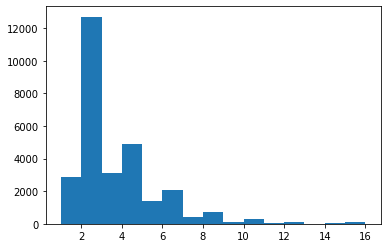

In [69]:
plt.hist(df.accommodates,bins=15);

### bathrooms

In [70]:
df.bathrooms.value_counts()
#hace sentido que existan "mitades" de un baño? 
#Si lo tiene para airbnb: https://twitter.com/airbnbhelp/status/684855675265101825?lang=en

1.0    23105
2.0     2929
1.5     1475
2.5      502
3.0      378
3.5      134
4.0       97
0.0       84
0.5       67
4.5       35
5.0       25
8.0       20
5.5       13
6.0        6
6.5        3
7.0        2
7.5        2
Name: bathrooms, dtype: int64

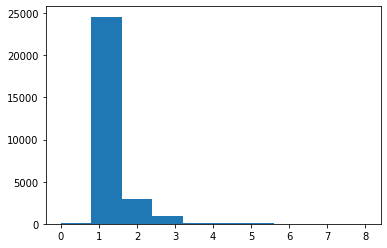

In [71]:
plt.hist(df.bathrooms);

### number_of_reviews

In [72]:
df.number_of_reviews.value_counts()
#No se cómo esta columna me ayude.
#Podría generar rangos de clasificación, pero mi primer rango se llevaría la mayoría de los datos...

1      2079
2      1740
3      1550
4      1257
5      1177
6       932
7       881
8       830
9       717
10      662
11      585
12      535
14      534
13      515
15      494
16      482
18      433
19      403
17      388
20      357
22      347
21      341
23      316
24      297
26      292
28      283
25      269
27      261
29      257
31      255
       ... 
349       1
525       1
254       1
286       1
382       1
303       1
360       1
328       1
327       1
311       1
338       1
354       1
370       1
291       1
451       1
260       1
388       1
532       1
229       1
277       1
309       1
341       1
389       1
453       1
469       1
326       1
374       1
383       1
295       1
279       1
Name: number_of_reviews, Length: 347, dtype: int64

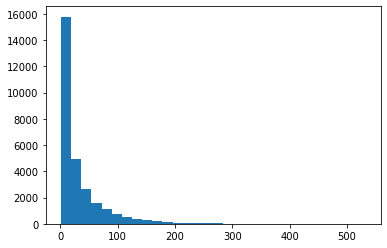

In [73]:
plt.hist(df.number_of_reviews,bins=30);

### review_scores_rating

In [74]:
df.review_scores_rating.value_counts()
#datos limpios
#genero rangos de clasificación?

100.0    7007
98.0     2512
97.0     2314
96.0     2286
95.0     2036
93.0     1872
99.0     1587
94.0     1508
90.0     1269
92.0     1143
91.0      903
80.0      753
89.0      659
88.0      574
87.0      513
85.0      340
86.0      274
84.0      246
83.0      208
60.0      137
82.0      106
81.0       83
70.0       73
73.0       63
79.0       53
78.0       52
75.0       50
77.0       38
76.0       36
20.0       27
67.0       27
74.0       21
40.0       21
65.0       16
72.0       16
50.0       10
68.0       10
47.0        5
64.0        5
71.0        5
69.0        4
63.0        3
53.0        3
57.0        1
54.0        1
62.0        1
27.0        1
35.0        1
56.0        1
55.0        1
49.0        1
66.0        1
Name: review_scores_rating, dtype: int64

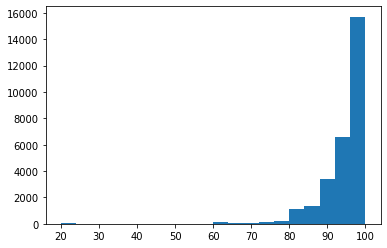

In [75]:
plt.hist(df.review_scores_rating,bins=20);

### bedrooms

In [76]:
df.bedrooms.value_counts()
#datos limpios

1.0     19309
2.0      4534
0.0      2758
3.0      1618
4.0       478
5.0       119
6.0        36
7.0        15
8.0         5
10.0        3
9.0         2
Name: bedrooms, dtype: int64

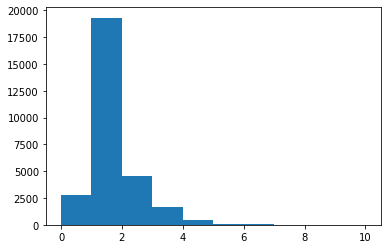

In [77]:
plt.hist(df.bedrooms);

### beds

In [78]:
df.beds.value_counts()
#datos limpios

1.0     16991
2.0      6786
3.0      2724
4.0      1288
5.0       536
6.0       263
8.0        87
7.0        81
10.0       38
9.0        36
16.0       13
12.0       12
11.0       10
13.0        7
15.0        2
18.0        1
14.0        1
0.0         1
Name: beds, dtype: int64

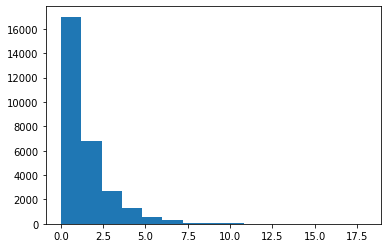

In [79]:
plt.hist(df.beds, bins=15);

### price

In [80]:
df.price.value_counts()
#datos limpios

150.0     961
100.0     891
75.0      782
99.0      717
65.0      695
125.0     683
60.0      662
50.0      646
200.0     621
120.0     616
80.0      607
70.0      599
90.0      585
85.0      568
95.0      543
55.0      486
250.0     485
110.0     449
175.0     430
45.0      406
130.0     337
89.0      334
115.0     330
69.0      328
140.0     314
199.0     307
79.0      307
135.0     295
40.0      287
300.0     280
         ... 
459.0       1
1285.0      1
615.0       1
352.0       1
496.0       1
760.0       1
436.0       1
377.0       1
970.0       1
301.0       1
993.0       1
848.0       1
1150.0      1
1300.0      1
504.0       1
334.0       1
417.0       1
539.0       1
358.0       1
354.0       1
1450.0      1
1750.0      1
1195.0      1
530.0       1
338.0       1
262.0       1
482.0       1
266.0       1
509.0       1
1040.0      1
Name: price, Length: 564, dtype: int64

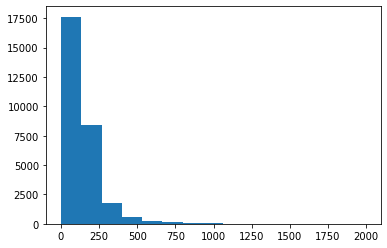

In [81]:
plt.hist(df.price, bins=15);

## 7. Generación de clasificaciones de zipcode

In [82]:
df.zipcode.value_counts()

11221                                                   536
11211.0                                                 523
90291                                                   465
94110                                                   440
20002                                                   356
10019                                                   334
10002                                                   308
90046                                                   303
10009.0                                                 299
10036                                                   291
11216                                                   289
90026                                                   274
11222                                                   270
20001                                                   270
94114                                                   269
20009                                                   262
10031                                   

In [83]:
df.zipcode=df.zipcode.apply(lambda x: x[0:5])

In [84]:
df.zipcode.value_counts()

11211    630
11221    538
90291    465
94110    440
11216    429
11206    403
10002    398
20002    356
10009    352
11238    342
10019    335
90046    303
10003    298
11237    297
10036    291
11233    289
11222    280
90026    274
94114    271
20001    271
10027    262
20009    262
10029    261
10031    259
90028    257
11215    254
10011    248
10025    237
94117    235
11249    235
        ... 
91733      1
20782      1
10550      1
10279      1
60652      1
90220      1
10270      1
10309      1
60639      1
91706      1
95202      1
20815      1
20004      1
90201      1
90604      1
10129      1
90040      1
90713      1
90222      1
90059      1
90071      1
90061      1
1m         1
11366      1
90044      1
02143      1
60619      1
02199      1
60707      1
91775      1
Name: zipcode, Length: 545, dtype: int64

In [85]:
#Voy a clasificar los zipcodes por region o 'sectional center facility':
#https://en.wikipedia.org/wiki/ZIP_Code#By_geography:
    #ZIP Codes are numbered with the first digit representing a certain group of U.S. states, the second and third digits 
    #together representing a region in that group (or perhaps a large city) and the fourth and fifth digits representing a group 
    #of delivery addresses within that region.
#https://en.wikipedia.org/wiki/Sectional_center_facility

#Pondre estos nuevos valores en una nueva variable:
df['regions'] = 0
df.regions.head()

0    0
1    0
2    0
3    0
4    0
Name: regions, dtype: int64

In [86]:
#¿Cómo no loopear todo el DATAFRAME y llenar los valores indicados de Regions?
#for e in df.zipcode[df.city=="NYC"].index:
#    print(df.zipcode[e])

#Loopear el índice específico de cada City y llenar ese índice específico con el nuevo valor en Regions

In [87]:
#######  NUEVA YORK  ##########
'''
New York (100-102; 104 The Bronx) Morgan General Mail Facility, 341 Ninth Avenue, New York, NY 10199[4]
Brooklyn (103 Staten Island; 112 Brooklyn; 116 Far Rockaway) 1050 Forbell Street #2005, Brooklyn, NY 11256[4]
Westchester (105-109; Connecticut 066, 068, 069) 1000 Westchester Avenue, White Plains, NY 10610[4]
Queens (110 Floral Park; 111 Long Island City; 113 Flushing; 114 Jamaica) 142-02 20th Avenue, College Point, NY 11356[4][5]
Western Nassau (115) 830 Stewart Avenue, Garden City[4]
Mid-Island (117-119, IRS 005) 160 Duryea Road, Melville[4]
Albany (120-123, 128, 129), 30 Old Karner Road, Albany
Mid-Hudson (124-127), 99 Enterprise Drive, Newburgh
Syracuse (130-139), 5640 E. Taft Road, Syracuse
Buffalo (140-143, 147), 1200 William Street, Buffalo
Rochester (144-146, 148, 149, Pennsylvania 167), 1335 Jefferson Road, Rochester
'''
for e in df.zipcode[df.city=="NYC"].index:
    if df.zipcode[e].startswith(("100","101","102","104")):
        df.regions[e] = "New York Mains"
    elif df.zipcode[e].startswith(("103","112","116")):
        df.regions[e] = "Brooklyn"
    elif df.zipcode[e].startswith(("105","106","107","108","109")):
        df.regions[e] = "Westchester"
    elif df.zipcode[e].startswith(("110","111","113","114")):
        df.regions[e] = "Queens"
#    elif df.zipcode[e].startswith(("115")):
#        df.regions[e] = "Western Nassau"
#    elif df.zipcode[e].startswith(("117","118","119","160")):
#        df.regions[e] = "Mid-Island"
#    elif df.zipcode[e].startswith(("120","121","122","123","128","129")):
#        df.regions[e] = "Albany"
#    elif df.zipcode[e].startswith(("124","125","126","127")):
#        df.regions[e] = "Mid-Hudson"
#    elif df.zipcode[e].startswith(("130","131","132","133","134","135","136","137","138","139")):
#        df.regions[e] = "Syracuse"
#    elif df.zipcode[e].startswith(("140","141","142","143","147")):
#        df.regions[e] = "Buffalo"
#    elif df.zipcode[e].startswith(("144","145","146","148","149")):
#        df.regions[e] = "Rochester"

In [88]:
df.regions.value_counts()

0                 15499
New York Mains     6262
Brooklyn           5714
Queens             1401
Westchester           1
Name: regions, dtype: int64

In [89]:
df.regions[df.city == 'NYC'].value_counts()
#Hay dos valores que no fueron cubiertos por los elifs...pendiente!!!!

New York Mains    6262
Brooklyn          5714
Queens            1401
Westchester          1
0                    1
Name: regions, dtype: int64

In [90]:
#######  LA  ##########
'''
Los Angeles (900-905, 907, 908) 7001 S. Central Ave., Los Angeles, CA 90052-9998
Industry (906, 917, 918) 15421 E Gale Ave., City of Industry, CA 91715-9608
Santa Clarita (910-916) 28201 Franklin Pkwy., Santa Clarita, CA 91383-9998[2]
San Diego (919-921) 11251 Rancho Carmel Drive, San Diego, CA 92199-9998
San Bernardino (922-925) 1900 W Redlands Blvd., San Bernardino, CA 92403-9997
Santa Ana (926-927) 3101 W. Sunflower Ave., Santa Ana, CA 92799-0101
Anaheim (928) 5335 E. La Palma Ave., Anaheim, CA 92899-9002
Santa Barbara (930-931, 934) 400 Storke Road, Goleta, CA 93117
Bakersfield (932-933, 935)
Fresno (936-937, IRS 938)
San Jose (939, 950-951) 1750 Lundy Avenue, San Jose, CA 95101-9998
San Francisco (940-941, 943-944, 949, 954)
Sacramento (942, 952-953, 956-959) 3775 Industrial Blvd., West Sacramento, CA 95799-9998
Oakland (945-948) 1675 7th St, Oakland, CA 94615
Eureka (955)
Redding (960)
'''
for e in df.zipcode[df.city=="LA"].index:
    if df.zipcode[e].startswith(("900","901","902")):
        df.regions[e] = "LA Mains"
    elif df.zipcode[e].startswith(("903")):
        df.regions[e] = "Inglewood"
    elif df.zipcode[e].startswith(("904")):
        df.regions[e] = "Santa Monica"
    elif df.zipcode[e].startswith(("905")):
        df.regions[e] = "Torrance"
    elif df.zipcode[e].startswith(("907","908")):
        df.regions[e] = "Long Beach"
    elif df.zipcode[e].startswith(("906","917","918")):
        df.regions[e] = "Industry"
    elif df.zipcode[e].startswith(("910","911","912","913","914","915","916")):
        df.regions[e] = "Santa Clarita"
#    elif df.zipcode[e].startswith(("919","920","921")):
#        df.regions[e] = "San Diego"
#    elif df.zipcode[e].startswith(("922","923","924","925","147")):
#        df.regions[e] = "San Bernardino"

In [91]:
df.regions.value_counts()

0                 7928
New York Mains    6262
Brooklyn          5714
LA Mains          5420
Queens            1401
Santa Clarita     1190
Long Beach         356
Santa Monica       273
Industry           235
Inglewood           55
Torrance            42
Westchester          1
Name: regions, dtype: int64

In [92]:
df.regions[df.city == 'LA'].value_counts()
#Los elifs que agregue son necesarios para cubrir todos los zipcodes de esta cuidad

LA Mains         5420
Santa Clarita    1190
Long Beach        356
Santa Monica      273
Industry          235
Inglewood          55
Torrance           42
Name: regions, dtype: int64

In [93]:
#######  Chicago  ##########
df.zipcode[df.city == 'Chicago'].value_counts()
#Chicago es una región por si mismo, y los únicas regiones que tienen sus valores son 606 o 607.

60622    179
60647    174
60614    108
60618     88
60608     85
60657     79
60613     74
60640     69
60642     66
60610     65
60626     53
60612     48
60615     42
60660     41
60653     40
60616     40
60625     39
60641     28
60637     27
60611     27
60605     27
60645     22
60607     22
60602     20
60623     19
60654     17
60601     14
60624     12
60661     12
60651      9
60649      9
60630      9
60659      7
60609      6
60634      6
60643      5
60621      5
60629      4
60644      4
60632      4
60638      3
60646      3
60631      3
60656      3
60620      2
60652      1
60707      1
60639      1
60619      1
Name: zipcode, dtype: int64

In [94]:
for e in df.zipcode[df.city=="Chicago"].index:
        df.regions[e] = "Chicago"

In [95]:
df.regions.value_counts()

0                 6305
New York Mains    6262
Brooklyn          5714
LA Mains          5420
Chicago           1623
Queens            1401
Santa Clarita     1190
Long Beach         356
Santa Monica       273
Industry           235
Inglewood           55
Torrance            42
Westchester          1
Name: regions, dtype: int64

In [96]:
df.city.unique()

array(['NYC', 'SF', 'LA', 'Boston', 'DC', 'Chicago'], dtype=object)

In [97]:
#######  SF  ##########
df.zipcode[df.city == 'SF'].value_counts()
#Mismo caso de Chicago para San Francisco

94110    440
94114    271
94117    235
94109    158
94103    144
94107    143
94115    137
94112    135
94131    134
94122    127
94118    102
94123    101
94133     86
94102     82
94116     78
94121     72
94124     51
94127     51
94108     49
94134     38
94105     33
94132     24
94158      8
94014      6
94111      4
94104      3
95202      1
Name: zipcode, dtype: int64

In [98]:
for e in df.zipcode[df.city=="SF"].index:
        df.regions[e] = "San Francisco"

In [99]:
df.regions.value_counts()

New York Mains    6262
Brooklyn          5714
LA Mains          5420
0                 3592
San Francisco     2713
Chicago           1623
Queens            1401
Santa Clarita     1190
Long Beach         356
Santa Monica       273
Industry           235
Inglewood           55
Torrance            42
Westchester          1
Name: regions, dtype: int64

In [100]:
#######  Boston  ##########
df.zipcode[df.city == 'Boston'].value_counts()
#Mismo caso de Chicago y SF para Boston

02116    179
02130    151
02127    121
02118    109
02135    103
02134     99
02114     99
02128     81
02215     80
02125     80
02115     69
02119     67
02113     60
02129     54
02124     51
02131     51
02111     48
02108     45
02122     44
02109     29
02121     27
02132     26
02120     23
02136     20
02110     18
02210     18
02126     15
02467      5
02145      2
02199      1
02143      1
Name: zipcode, dtype: int64

In [101]:
for e in df.zipcode[df.city=="Boston"].index:
        df.regions[e] = "Boston"

In [102]:
df.regions.value_counts()

New York Mains    6262
Brooklyn          5714
LA Mains          5420
San Francisco     2713
0                 1816
Boston            1776
Chicago           1623
Queens            1401
Santa Clarita     1190
Long Beach         356
Santa Monica       273
Industry           235
Inglewood           55
Torrance            42
Westchester          1
Name: regions, dtype: int64

In [103]:
#######  Boston  ##########
df.zipcode[df.city == 'DC'].value_counts()
#Mismo caso de Chicago/SF/Boston para DC

20002    356
20001    271
20009    262
20003    136
20011    126
20010    115
20007     74
20024     55
20020     53
20017     48
20008     48
20037     43
20019     42
20018     39
20005     34
20016     30
20012     27
20036     18
20015     15
20032      7
20006      6
20712      3
20910      2
20052      1
20782      1
20815      1
20816      1
20004      1
Name: zipcode, dtype: int64

In [104]:
for e in df.zipcode[df.city=="DC"].index:
        df.regions[e] = "Washington"

In [105]:
df.regions.value_counts()
#Con esta nueva clasificación, puedo dropear la columna ZipCode y City, y usar esta en su lugar.
#Voy a clasificar como others a todos menos a los primeros 9

New York Mains    6262
Brooklyn          5714
LA Mains          5420
San Francisco     2713
Washington        1815
Boston            1776
Chicago           1623
Queens            1401
Santa Clarita     1190
Long Beach         356
Santa Monica       273
Industry           235
Inglewood           55
Torrance            42
Westchester          1
0                    1
Name: regions, dtype: int64

In [106]:
for e in range(len(df.regions)):
    if df.regions[e] not in ['New York Mains','Brooklyn','LA Mains','San Francisco','Washington','Boston','Chicago','Queens','Santa Clarita']:
        df.regions[e] = "Other"

In [107]:
df.regions.value_counts()

New York Mains    6262
Brooklyn          5714
LA Mains          5420
San Francisco     2713
Washington        1815
Boston            1776
Chicago           1623
Queens            1401
Santa Clarita     1190
Other              963
Name: regions, dtype: int64

In [108]:
df.drop("zipcode", axis=1, inplace=True)
df.drop("city", axis=1, inplace=True)
#df.shape

## 8. De categóricas a nominal

In [109]:
df.dtypes

property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
cancellation_policy        object
cleaning_fee                 bool
host_identity_verified     object
instant_bookable           object
number_of_reviews           int64
review_scores_rating      float64
bedrooms                  float64
beds                      float64
price                     float64
host_response              object
amenities_ratio           float64
regions                    object
dtype: object

In [110]:
df.head()

,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,price,host_response,amenities_ratio,regions
0,Apartment,Entire home/apt,7,1.0,strict,True,f,t,6,93.0,3.0,3.0,169.0,HOT,0.194805,New York Mains
1,Apartment,Private room,2,1.0,strict,True,t,t,3,100.0,1.0,1.0,85.0,HOT,0.129870,San Francisco
2,Condominium,Entire home/apt,2,1.0,moderate,True,t,f,9,93.0,1.0,1.0,120.0,HOT,0.337662,LA Mains
3,House,Private room,2,1.0,moderate,True,f,f,159,99.0,1.0,1.0,120.0,HOT,0.272727,San Francisco
4,Apartment,Private room,2,1.0,strict,True,t,f,82,93.0,1.0,1.0,100.0,HOT,0.194805,New York Mains


In [111]:
###### Los valores que son booleanos, los convertire con un label-encoding  #####################
#cleaning_fee, host_identity_verified, instant_bookable, host_response

In [112]:
df.cleaning_fee.value_counts()

True     23693
False     5184
Name: cleaning_fee, dtype: int64

In [113]:
df.host_identity_verified.value_counts()

t    20923
f     7954
Name: host_identity_verified, dtype: int64

In [114]:
df.instant_bookable.value_counts()

f    20005
t     8872
Name: instant_bookable, dtype: int64

In [115]:
df.host_response.value_counts()

HOT        23319
NOT HOT     5558
Name: host_response, dtype: int64

In [116]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

pd.DataFrame(le.fit_transform(df.cleaning_fee), columns=["value"]).value.value_counts() #CORRECTO para cleaning_fee

1    23693
0     5184
Name: value, dtype: int64

In [117]:
df.cleaning_fee=pd.DataFrame(le.fit_transform(df.cleaning_fee))
df.cleaning_fee.value_counts()

1    23693
0     5184
Name: cleaning_fee, dtype: int64

In [118]:
pd.DataFrame(le.fit_transform(df.host_identity_verified), columns=["value"]).value.value_counts() #CORRECTO para host_identity_verified

1    20923
0     7954
Name: value, dtype: int64

In [119]:
df.host_identity_verified=pd.DataFrame(le.fit_transform(df.host_identity_verified))
df.host_identity_verified.value_counts()

1    20923
0     7954
Name: host_identity_verified, dtype: int64

In [120]:
pd.DataFrame(le.fit_transform(df.instant_bookable), columns=["value"]).value.value_counts() #CORRECTO para instant_bookable

0    20005
1     8872
Name: value, dtype: int64

In [121]:
df.instant_bookable=pd.DataFrame(le.fit_transform(df.instant_bookable))
df.instant_bookable.value_counts()

0    20005
1     8872
Name: instant_bookable, dtype: int64

In [122]:
df.host_response=np.where(df.host_response == "HOT",1,0)
df.host_response.value_counts()

1    23319
0     5558
Name: host_response, dtype: int64

In [123]:
df.head()

,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,price,host_response,amenities_ratio,regions
0,Apartment,Entire home/apt,7,1.0,strict,1,0,1,6,93.0,3.0,3.0,169.0,1,0.194805,New York Mains
1,Apartment,Private room,2,1.0,strict,1,1,1,3,100.0,1.0,1.0,85.0,1,0.129870,San Francisco
2,Condominium,Entire home/apt,2,1.0,moderate,1,1,0,9,93.0,1.0,1.0,120.0,1,0.337662,LA Mains
3,House,Private room,2,1.0,moderate,1,0,0,159,99.0,1.0,1.0,120.0,1,0.272727,San Francisco
4,Apartment,Private room,2,1.0,strict,1,1,0,82,93.0,1.0,1.0,100.0,1,0.194805,New York Mains


In [124]:
#### Ahora solo hay 3 columnas para pasar a nominal
df.dtypes

property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
cancellation_policy        object
cleaning_fee                int64
host_identity_verified      int32
instant_bookable            int32
number_of_reviews           int64
review_scores_rating      float64
bedrooms                  float64
beds                      float64
price                     float64
host_response               int32
amenities_ratio           float64
regions                    object
dtype: object

In [125]:
### DUMMIES
df_dummie=pd.get_dummies(df,drop_first=True)
df_dummie.dtypes

accommodates                      int64
bathrooms                       float64
cleaning_fee                      int64
host_identity_verified            int32
instant_bookable                  int32
number_of_reviews                 int64
review_scores_rating            float64
bedrooms                        float64
beds                            float64
price                           float64
host_response                     int32
amenities_ratio                 float64
property_type_Condominium         uint8
property_type_Guesthouse          uint8
property_type_House               uint8
property_type_Loft                uint8
property_type_Other               uint8
property_type_Townhouse           uint8
room_type_Private room            uint8
room_type_Shared room             uint8
cancellation_policy_moderate      uint8
cancellation_policy_strict        uint8
regions_Brooklyn                  uint8
regions_Chicago                   uint8
regions_LA Mains                  uint8


In [126]:
df_dummie.shape

(28877, 31)

In [128]:
##### SIMPLE ENCODING
#property_type              object
#room_type                  object
#cancellation_policy        object
#regions                    object
df.property_type.value_counts()

Apartment      18543
House           6655
Condominium     1081
Other           1078
Townhouse        720
Loft             552
Guesthouse       248
Name: property_type, dtype: int64

In [129]:
df.room_type.value_counts()

Entire home/apt    16158
Private room       11993
Shared room          726
Name: room_type, dtype: int64

In [130]:
df.cancellation_policy.value_counts()

strict      14846
moderate     8492
flexible     5539
Name: cancellation_policy, dtype: int64

In [138]:
df.regions.value_counts()

New York Mains    6262
Brooklyn          5714
LA Mains          5420
San Francisco     2713
Washington        1815
Boston            1776
Chicago           1623
Queens            1401
Santa Clarita     1190
Other              963
Name: regions, dtype: int64

In [139]:
property_type={'Apartment':6, 'House':5, 'Condominium':4, 'Other':3, 'Townhouse':2, 'Loft':1, 'Guesthouse':0}

room_type={'Entire home/apt':2, 'Private room':1, 'Shared room':0}

cancellation_policy={'strict':2, 'moderate':1, 'flexible':0}

regions={'New York Mains':9, 'Brooklyn':8, 'LA Mains':7, 'San Francisco':6, 'Washington':5, 'Boston':4, 'Chicago':3, 'Queens':2, 'Santa Clarita':1, 'Other':0}

def labeling(s, dic):
    return dic[s]

In [136]:
df.property_type=df.property_type.apply(lambda x: labeling(x, property_type))

df.room_type=df.room_type.apply(lambda x: labeling(x, room_type))

df.cancellation_policy=df.cancellation_policy.apply(lambda x: labeling(x, cancellation_policy))

df.regions=df.regions.apply(lambda x: labeling(x, regions))

In [140]:
df.head()

,property_type,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds,price,host_response,amenities_ratio,regions
0,6,2,7,1.0,2,1,0,1,6,93.0,3.0,3.0,169.0,1,0.194805,9
1,6,1,2,1.0,2,1,1,1,3,100.0,1.0,1.0,85.0,1,0.129870,6
2,4,2,2,1.0,1,1,1,0,9,93.0,1.0,1.0,120.0,1,0.337662,7
3,5,1,2,1.0,1,1,0,0,159,99.0,1.0,1.0,120.0,1,0.272727,6
4,6,1,2,1.0,2,1,1,0,82,93.0,1.0,1.0,100.0,1,0.194805,9


In [142]:
df.to_csv(path_or_buf="df_encoded.csv",index=False)

In [127]:
#df_dummie.to_csv(path_or_buf="df_dummie.csv",index=False)